In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1.1.1 Пример

In [3]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [4]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

0.9999999999999999 -0.9499999999999997


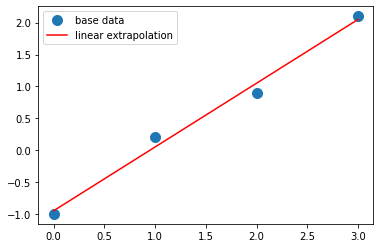

In [6]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='base data', markersize=10)
plt.plot(x, m*x + c, 'r', label='linear extrapolation')
plt.legend()
plt.show()

1.1.2 Пример

In [7]:
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5, 5, 11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

[-4.77430943 -3.65342165 -3.3374372  -1.85191725 -0.97504166 -0.2669204
  1.08698262  2.13093591  2.788017    4.31480898  4.7217443 ]
[25.41881058 16.1247344   8.6912986   4.33599324  0.66535714 -0.25930035
  0.9611928   4.48467931  8.94077192 15.59341704 25.06626684]


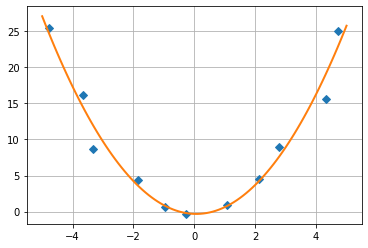

In [8]:
m = vstack((x**2, x, ones(11))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, "D")

plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('parabola.png')

1.1.3 Пример

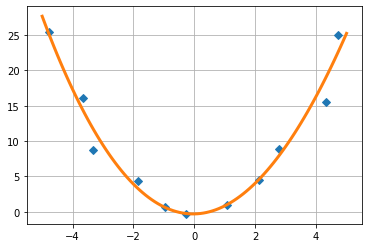

In [9]:
m = vstack((x**3, x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, "D")
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('3rd degree polynomial.png')

Задание:

Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

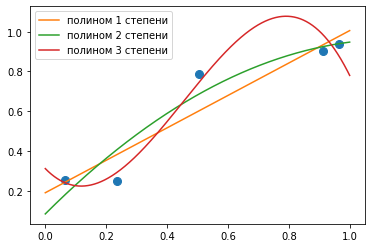

In [ ]:
s_size = 5
xs = np.linspace(0, 1, 1000)
x = np.random.random(s_size)
y = np.random.random(s_size)

A = np.vstack([x, np.ones(s_size)]).T
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
plt.plot(x, y, 'o', markersize=8)
plt.plot(xs, m*xs + c, label="полином 1 степени")

m = np.vstack((x**2, x, np.ones(s_size))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
plt.plot(xs, s[0] * xs ** 2 + s[1] * xs + s[2], '-', label="полином 2 степени")

m = np.vstack((x**3, x**2, x, np.ones(s_size))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
plt.plot(xs, s[0] * xs ** 3 + s[1] * xs **2 + s[2] * xs + s[3], '-', label="полином 3 степени")

plt.legend()
plt.show()

1.1.4 Пример

In [10]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0 + b1 * np.exp(-b2 * x ** 2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))

In [12]:
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt

array([0.22400569, 0.782263  , 0.45607112])

0.00019760591848270293
0.1086899275837791


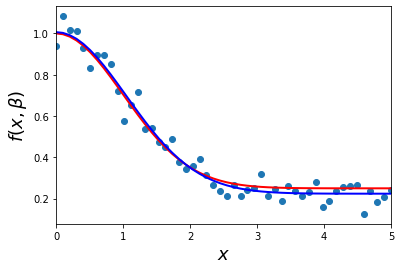

In [13]:
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

1.1.5 Пример

[0.2280352  0.75991918]
0.00013216080038930183
0.11621035665351676


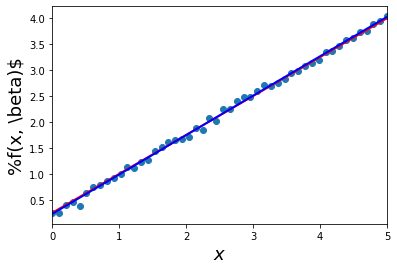

In [15]:
beta = (0.25, 0.75)
def f(x, b0, b1):
  return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata-f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"%f(x, \beta)$", fontsize=18)
plt.show()

[0.25932611 0.74285203 0.50011166]
0.00013337601415560086
0.11122163496926636


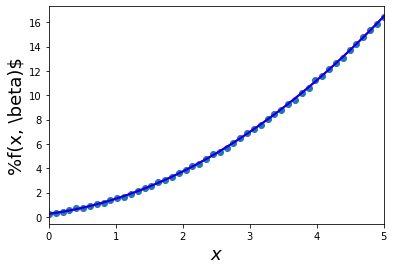

In [16]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0 + b1 * x + b2 * x * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata-f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"%f(x, \beta)$", fontsize=18)
plt.show()

[1.00903734 1.99758796]
5.186002222924913e-05
0.11992326159050555


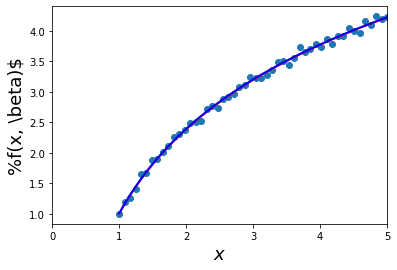

In [17]:
beta = (1, 2)
def f(x, b0, b1):
  return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata-f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"%f(x, \beta)$", fontsize=18)
plt.show()

[0.99568796 2.00265701]
8.546805255868394e-06
0.20638545153585663


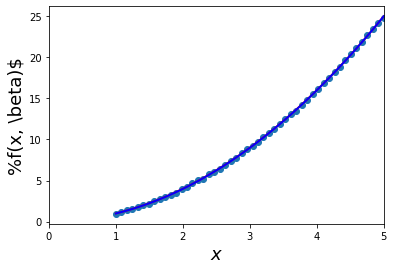

In [18]:
beta = (1, 2)
def f(x, b0, b1):
  return b0 * x ** b1

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata-f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"%f(x, \beta)$", fontsize=18)
plt.show()

Задание:

Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

y = a*x + b

y = a*x^2 + b*x + c

y = a*log(x)+c

y = a * x^b + c

y = b * e^(-a*2*x^2) + c

Проверим обобщающую способность представленных полиномов для точек из ((1,8), (1,8)) исходя из метрики MSE

In [ ]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

def f_0(x, a, b):
  return a * x + b

def f_1(x, a, b, c):
  return a*x**2 + b*x + c

def f_2(x, a, b):
  return a*np.log(x)+b

def f_3(x, a, b, c):
  return a * x**b + c

def f_4(x, a, b, c):
  return b * np.e ** (-a*2*x**2) + c

/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


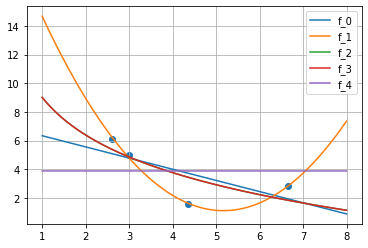

loss of  f_0  is  1.6588944599574078
loss of  f_1  is  0.011652628545129221
loss of  f_2  is  1.2780986385900965
loss of  f_3  is  1.2782478698599595
loss of  f_4  is  3.187706411836615


In [ ]:
s_size = 4
xs = np.linspace(1, 8, 10000)
x = np.random.uniform(1,8, s_size)
y = np.random.uniform(1,8, s_size)

funcs = [f_0, f_1, f_2, f_3, f_4]
losses = []
popts, povs = [], []
labels = ["f_0", "f_1", "f_2", "f_3", "f_4"]

for i in range(len(funcs)):
  popt, pcov = curve_fit(funcs[i], x, y, maxfev=64000)
  popts.append(popt)
  povs.append(pcov)
for i in range(len(funcs)):
  values = funcs[i](x, *popts[i])
  losses.append(mean_squared_error(values, y))

plt.grid()
[plt.plot(xs, funcs[i](xs, *popts[i]) , '-', label=labels[i]) for i in range(len(funcs))]
plt.scatter(x, y)
plt.legend()
plt.show()
[print("loss of ", labels[i], " is ", losses[i], end="\n") for i in range(len(funcs))]
None

Из значений метрики и изображения графиков можно судить, что некоторые функции подходят для этой задачи не лучше обычной прямой (y=ax+b), в то время как другие очень хорошо повторяют распределение точек на плоскости

1.2.1 Пример

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
my_dict = {"School time": [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75,
       3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5. , 5.5 ],
       "Grade": [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

,School time,Grade
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [25]:
print(dataset.shape)
dataset.describe()

(20, 2)


,School time,Grade
count,20.000000,20.000000
mean,2.887500,53.700000
std,1.501041,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.875000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


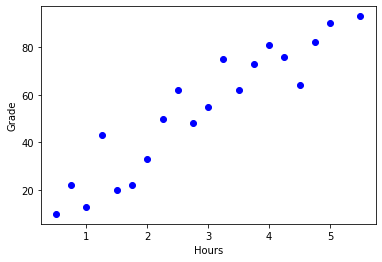

In [26]:
plt.scatter(dataset['School time'], dataset["Grade"], color='b', label='exam data')
plt.xlabel("Hours")
plt.ylabel("Grade")
plt.show()

In [27]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor=LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
3.168632075471699
[17.18867925]


In [28]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,90,89.112028
1,22,16.060142
2,93,97.706368
3,62,46.140330


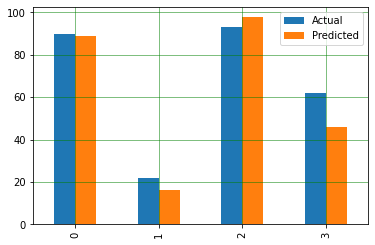

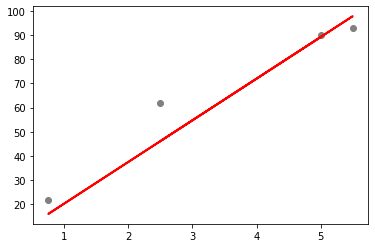

In [30]:
df.plot(kind="bar")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Задание:

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

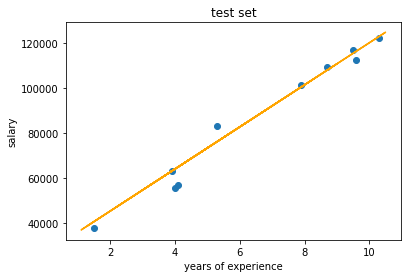

for y=a*x + b, a = 9345.942443122372 and c = 26816.192244031183


In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color='orange')
plt.title('test set')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()
print("for y=a*x + b, a =", *regressor.coef_, "and c =", regressor.intercept_)

1.3.1 Пример

In [31]:
import numpy as np
y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4 ,5 , 6, 0, 6, 3, 1, 3, 1]
X = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5 , 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7 ,8 ,6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]
X = np.transpose(X)
X = np.c_[X, np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


1.3.2 Пример

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [36]:
y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4 ,5 , 6, 0, 6, 3, 1, 3, 1]
X = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5 , 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7 ,8 ,6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [37]:
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [38]:
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


Задание

Задача:
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.

1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

Построим модель множественной линейной регрессии для данных о качестве красного вина

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = pd.read_csv('winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = dataset.drop('quality',axis=1)
y = dataset['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print("score on a dataset is: ", regressor.score(X_test, y_test))
print("coefficients:", regressor.coef_)
print("bias:", regressor.intercept_)

score on a dataset is:  0.3143805298575585
coefficients: [-8.94977387e-04 -1.13442553e+00  1.58012950e-02  2.16825484e-02
 -2.21651031e+00  2.20289983e-03 -3.14443034e-03 -1.17229124e+01
 -4.65165173e-01  9.43998462e-01  2.72541178e-01]
bias: 16.27395268154895


Задание*

Задача: Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

(Варианты заданий)

Вариант 2

x----y

0,0 5,0

0,2 5,0

0,4 4,0

0,6 4,0

0,8 6,0

1,0 6,0


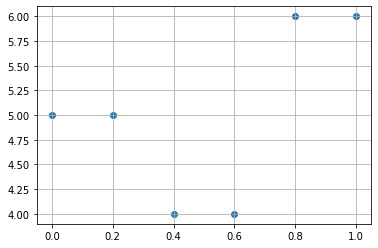

In [ ]:
n = 6
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = ([5.0, 5.0, 4.0, 4.0, 6.0, 6.0])
df = pd.DataFrame({'x':x, 'y':y})

xs = np.linspace(min(x), max(x), 1000)
plt.scatter(x, y)
plt.grid()

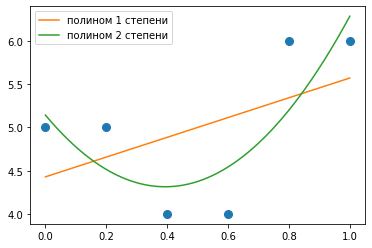

,x,y
0,0.0,5.0
1,0.2,5.0
2,0.4,4.0
3,0.6,4.0
4,0.8,6.0
5,1.0,6.0


In [ ]:
m = np.vstack((x, np.ones(n))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
plt.plot(x, y, 'o', markersize=8)
plt.plot(xs, s[0]*xs + s[1], label="полином 1 степени")

m = np.vstack((x**2, x, np.ones(n))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
plt.plot(xs, s[0] * xs ** 2 + s[1] * xs + s[2], '-', label="полином 2 степени")

plt.legend()
plt.show()
df